In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("47 - placement.csv")

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


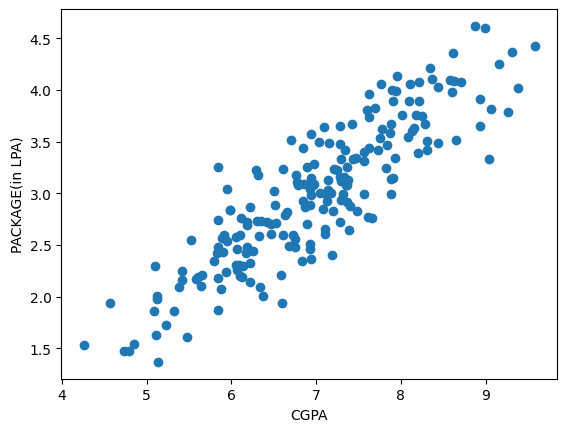

In [16]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('PACKAGE(in LPA)')
plt.show()

In [6]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [7]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [8]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr = LinearRegression()

In [13]:
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


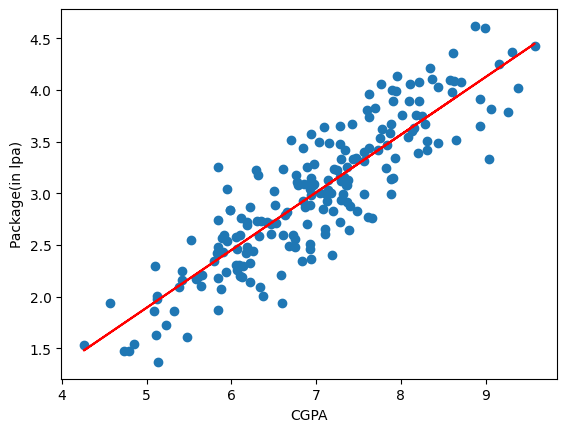

In [15]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel("Package(in lpa)")
plt.show()

In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [22]:
y_pred = lr.predict(X_test)

In [23]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [24]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [25]:
print("MSE", mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [29]:
print("RMSE", np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [31]:
print("R2", r2_score(y_test,y_pred))
r2 =  r2_score(y_test,y_pred)

R2 0.780730147510384


# Adjusted R2 score

In [32]:
X_test.shape

(40, 1)

In [36]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [38]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.428884,3.26
1,5.12,0.095985,1.98
2,7.82,0.076779,3.25
3,7.42,0.109402,3.67
4,6.94,0.170301,3.57


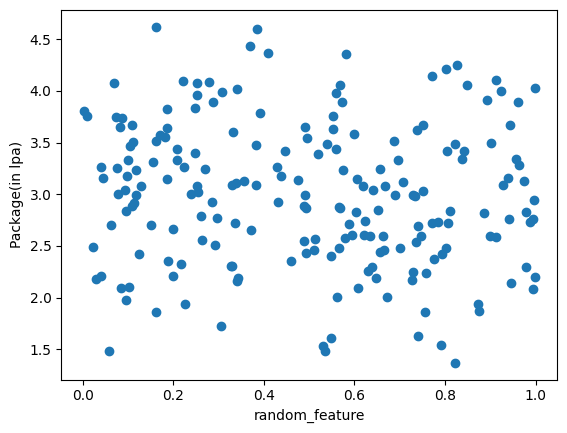

In [39]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel("Package(in lpa)")
plt.show()

In [40]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [42]:
lr = LinearRegression()

In [43]:
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [44]:
y_pred = lr.predict(X_test)

In [48]:
print("R2 Score", r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 Score 0.7809369696186668


In [49]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7690957247331893

In [50]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [51]:
new_df2.sample(5)

,cgpa,iq,package
124,6.06,1.11,2.31
72,7.78,4.02,3.62
99,6.61,2.04,3.24
30,7.36,4.16,3.26
121,6.50,3.72,3.02


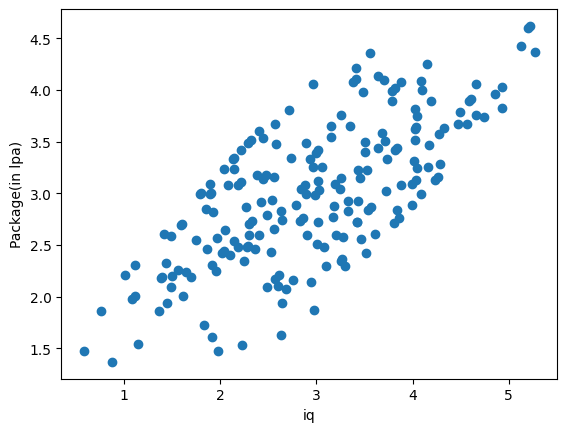

In [53]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel("Package(in lpa)")
plt.show()

In [60]:
np.random.randint(-100,100)

96

In [61]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [63]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [64]:
print("R2 Score", r2_score(y_test,y_pred))
r2 =  r2_score(y_test,y_pred)

R2 Score 0.7835917208076438


In [65]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7718939759864354